In [1]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType, TimestampType, StringType
from pyspark.sql.window import Window
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.utils import AnalysisException
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

# spark initialization
spark = SparkSession.builder.appName("gamedata").getOrCreate()
# load master database
hard_sales = spark.read.parquet("../database/parquet/hard_sales")


23/04/01 16:17:28 WARN Utils: Your hostname, apricot.local resolves to a loopback address: 127.0.0.1; using 192.168.0.42 instead (on interface en0)
23/04/01 16:17:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/01 16:17:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/04/01 16:17:28 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/04/01 16:17:28 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
23/04/01 16:17:28 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
23/04/01 16:17:28 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.


In [10]:
def plot_pie_chart_by_year(df, year):
    # 与えられた年のデータをフィルタリング
    yearly_data = df.filter(df["year"] == year)

    # 各メーカーの年間販売台数を集計
    maker_sales = yearly_data.groupBy("maker").agg(F.sum("units").alias("yearly_units"))

    # DataFrameをPandasのDataFrameに変換
    maker_sales_pd = maker_sales.toPandas()

    # メーカーごとの色を定義
    colors = {
        'Nintendo': 'red',
        'SONY': 'blue',
        'Microsoft': 'green'
    }

    # メーカー名に応じた色をリストに追加
    color_list = [colors[maker] for maker in maker_sales_pd['maker']]
    print(color_list)

    # 与えられた年のメーカー別シェアの円グラフを描画
    plt.figure(figsize=(8, 8))
    plt.pie(maker_sales_pd['yearly_units'], labels=maker_sales_pd['maker'], autopct='%1.1f%%', colors=color_list)
    plt.title(f'Maker Share in {year}')
    plt.show()

['red', 'green', 'blue']


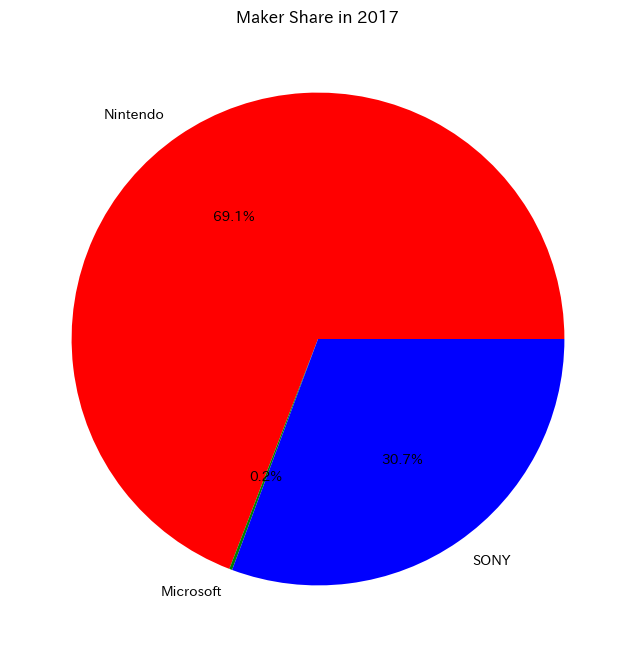

['red', 'green', 'blue']


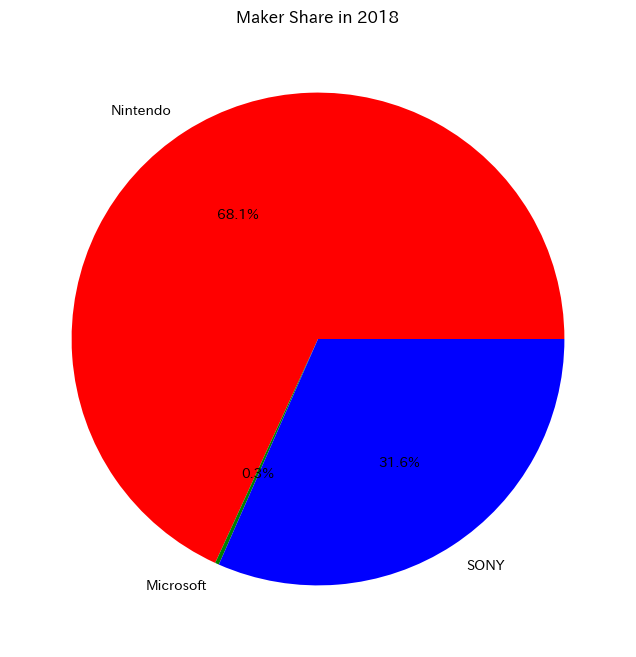

['red', 'green', 'blue']


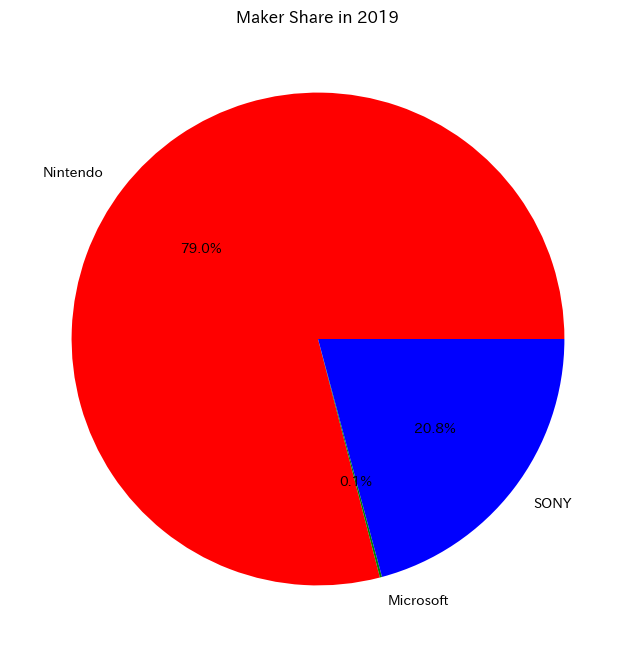

['red', 'green', 'blue']


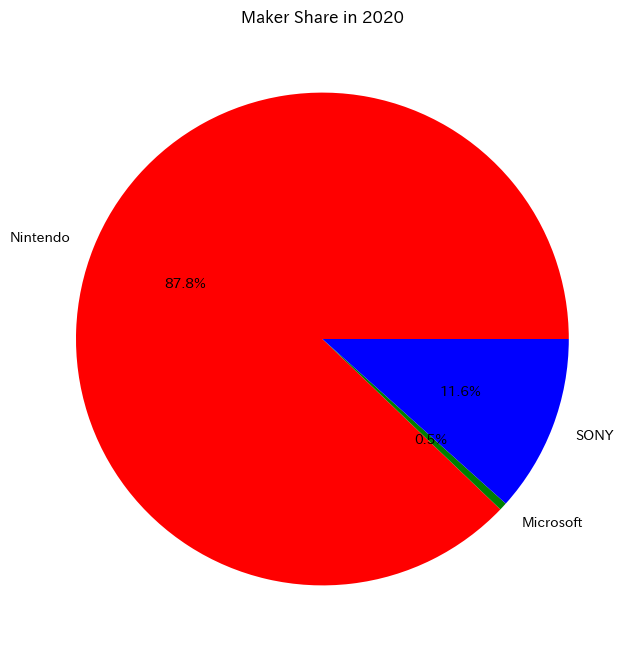

['red', 'green', 'blue']


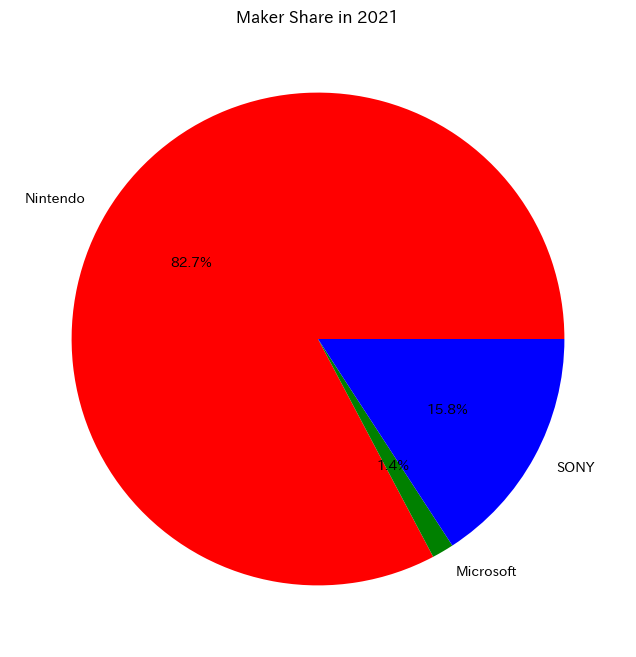

['red', 'green', 'blue']


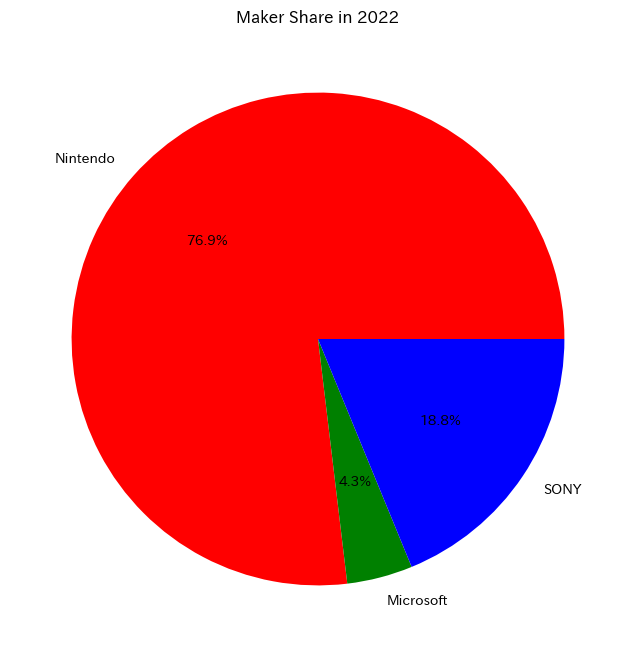

['red', 'green', 'blue']


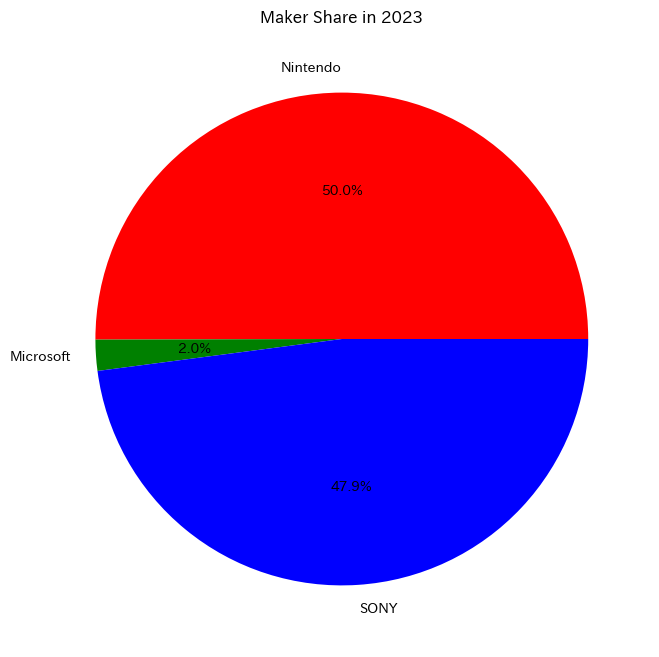

23/04/02 00:16:06 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 1042394 ms exceeds timeout 120000 ms
23/04/02 00:16:06 WARN SparkContext: Killing executors is not supported by current scheduler.
23/04/02 00:16:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.

In [11]:
# 関数を使って、2017年から2022年までの各年のメーカー別シェアを表示
for year in range(2017, 2024):
    plot_pie_chart_by_year(hard_sales, year)
